# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [595]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Visualization packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [596]:
df = pd.read_excel("Online Retail.xlsx", sheet_name='Online Retail',
                   usecols=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
                   dtype={'InvoiceNo': object, 'StockCode': object, 'Description': object, 'Quantity': int, 'InvoiceDate': object,
                         'UnitPrice': float, 'CustomerID': object, 'Country': object})
print('df Shape:', df.shape)
df.head()

df Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int32  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int32(1), object(6)
memory usage: 31.0+ MB


## Task 2: Data Cleaning

#### Remove unnecessary columns ####

'CustomerID' is irrelevant for the analysis together with 'InvoiceNo', so I'll drop those three columns. 

In [601]:
df = df.drop(columns=['InvoiceNo', 'CustomerID'])

In [602]:
df.isna().sum()

StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [603]:
df.isnull().sum()

StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

After dropping the above two columns, there are 1454 missing values in the 'Description' column. Since this is only small percentage from the total number of rows (less than 0,3%), I'll drop the rows with those missing values.

In [605]:
df = df.dropna()

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    540455 non-null  object 
 1   Description  540455 non-null  object 
 2   Quantity     540455 non-null  int32  
 3   InvoiceDate  540455 non-null  object 
 4   UnitPrice    540455 non-null  float64
 5   Country      540455 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 26.8+ MB


In [607]:
# Convert the 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d.%m.%Y')

# Extract only the date part
df['InvoiceDate'] = df['InvoiceDate'].dt.date
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')

In [608]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,United Kingdom


In [609]:
df['StockCode'] = df['StockCode'].astype('string')
df['Description'] = df['Description'].astype('string')
df['Country'] = df['Country'].astype('string')

In [610]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    540455 non-null  string        
 1   Description  540455 non-null  string        
 2   Quantity     540455 non-null  int32         
 3   InvoiceDate  540455 non-null  datetime64[ns]
 4   UnitPrice    540455 non-null  float64       
 5   Country      540455 non-null  string        
dtypes: datetime64[ns](1), float64(1), int32(1), string(3)
memory usage: 26.8 MB


#### Remove duplicated rows ####

In [612]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (71183, 6)


In [613]:
df = df.drop_duplicates()

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469272 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    469272 non-null  string        
 1   Description  469272 non-null  string        
 2   Quantity     469272 non-null  int32         
 3   InvoiceDate  469272 non-null  datetime64[ns]
 4   UnitPrice    469272 non-null  float64       
 5   Country      469272 non-null  string        
dtypes: datetime64[ns](1), float64(1), int32(1), string(3)
memory usage: 23.3 MB


## Task 3: Detecting Outliers

9.0


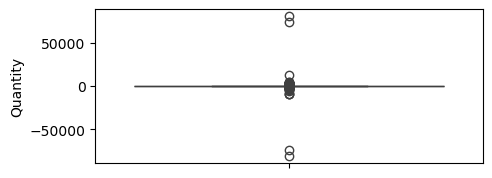

In [616]:
print(df['Quantity'].quantile(0.75) - df['Quantity'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(df['Quantity']);

In [617]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Number of outliers in 'Quantity':", ((df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)).sum())

Number of outliers in 'Quantity': 52547


In [618]:
# Remove outliers from the 'Quantity' column
df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416725 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    416725 non-null  string        
 1   Description  416725 non-null  string        
 2   Quantity     416725 non-null  int32         
 3   InvoiceDate  416725 non-null  datetime64[ns]
 4   UnitPrice    416725 non-null  float64       
 5   Country      416725 non-null  string        
dtypes: datetime64[ns](1), float64(1), int32(1), string(3)
memory usage: 20.7 MB


2.9000000000000004


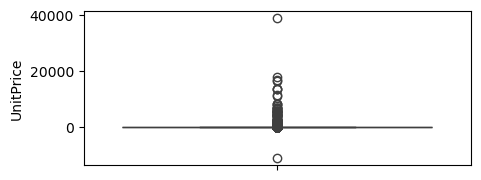

In [620]:
print(df['UnitPrice'].quantile(0.75) - df['UnitPrice'].quantile(0.25))
plt.figure(figsize=(5,2))
sns.boxplot(df['UnitPrice']);

In [621]:
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Number of outliers in 'UnitPrice':", ((df['UnitPrice'] < lower_bound) | (df['UnitPrice'] > upper_bound)).sum())


Number of outliers in 'UnitPrice': 28570


In [622]:
# Remove outliers from the 'UnitPrice' column
df = df[(df['UnitPrice'] >= lower_bound) & (df['UnitPrice'] <= upper_bound)]

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388155 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    388155 non-null  string        
 1   Description  388155 non-null  string        
 2   Quantity     388155 non-null  int32         
 3   InvoiceDate  388155 non-null  datetime64[ns]
 4   UnitPrice    388155 non-null  float64       
 5   Country      388155 non-null  string        
dtypes: datetime64[ns](1), float64(1), int32(1), string(3)
memory usage: 19.2 MB


## Task 4: Data Visualisations and Insights

#### Top selling products based on quantities sold ####

In [659]:
df.groupby(by='Description')['Quantity'].sum().sort_values(ascending=False)


Description
JUMBO BAG RED RETROSPOT               9060
WHITE HANGING HEART T-LIGHT HOLDER    7582
LUNCH BAG RED RETROSPOT               6924
ASSORTED COLOUR BIRD ORNAMENT         6699
LUNCH BAG  BLACK SKULL.               5773
                                      ... 
SAMPLES                                -16
damages                                -27
sold as set on dotcom                  -30
ebay                                   -37
damaged                                -83
Name: Quantity, Length: 3846, dtype: int32

From the above counts, most quantities are sold from the product JUMBO BAG RED RETROSPOT. Let's plot a histogram of sold products.   

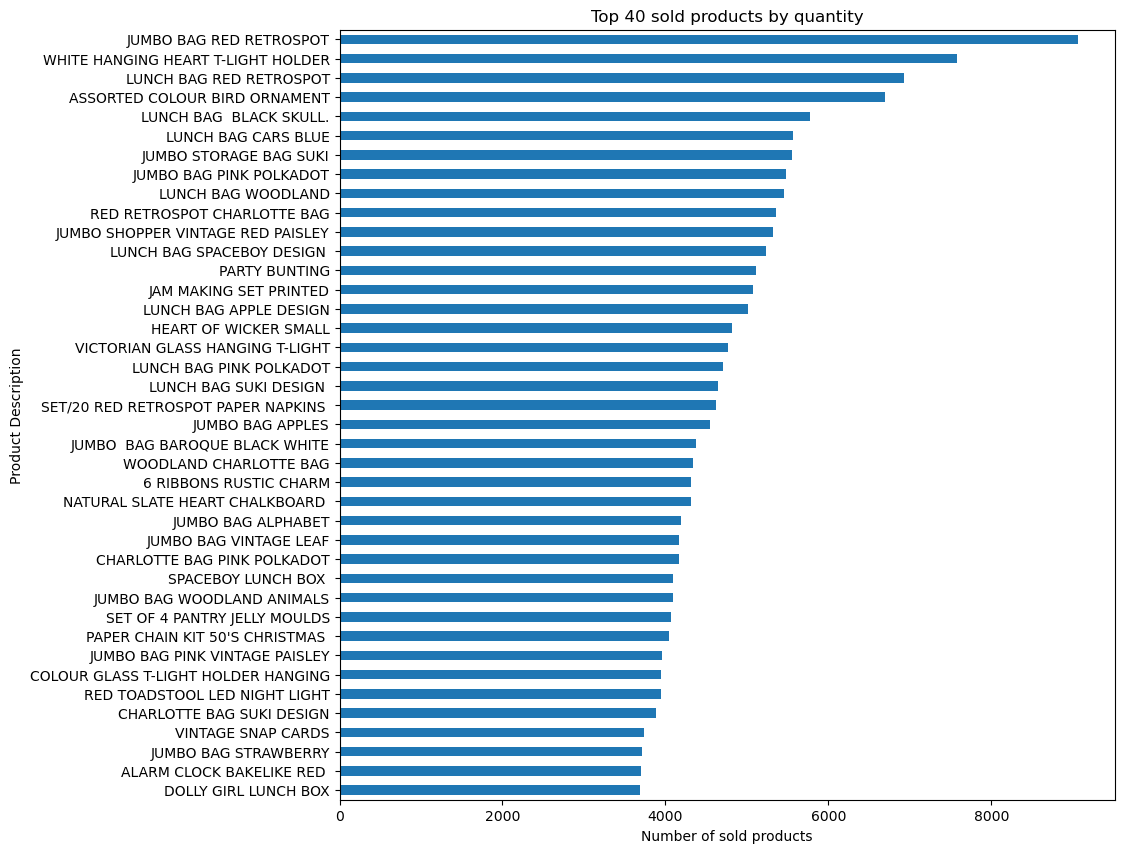

In [669]:
top_40 = df.groupby(by='Description')['Quantity'].sum().sort_values(ascending=False).nlargest(40)

top_40_sorted = top_40.sort_values(ascending=True)

# Plot the horizontal bar chart
top_40_sorted.plot(kind='barh', figsize=(10,10))

plt.title("Top 40 sold products by quantity")
plt.xlabel('Number of sold products by quantity')
plt.ylabel('Product Description');

#### Top-selling countries based on the quantity sold ####

In [665]:
df.groupby(by='Country')['Quantity'].sum().sort_values(ascending=False)


Country
United Kingdom          1571759
Germany                   58356
France                    53034
EIRE                      44421
Belgium                   13405
Spain                     12930
Switzerland               11895
Portugal                   9469
Norway                     5885
Italy                      4970
Channel Islands            4339
Finland                    4163
Netherlands                4145
Australia                  3487
Cyprus                     2960
Austria                    2819
Denmark                    2199
Poland                     2153
Sweden                     1861
Unspecified                1723
Hong Kong                  1531
Israel                     1398
Singapore                  1318
Iceland                    1281
Greece                     1087
Canada                      962
Malta                       612
United Arab Emirates        492
USA                         477
Japan                       339
European Community          337


From the above counts, far most products are sold in the United Kingdom. Let's plot a histogram of top 5 countries by sold products.   

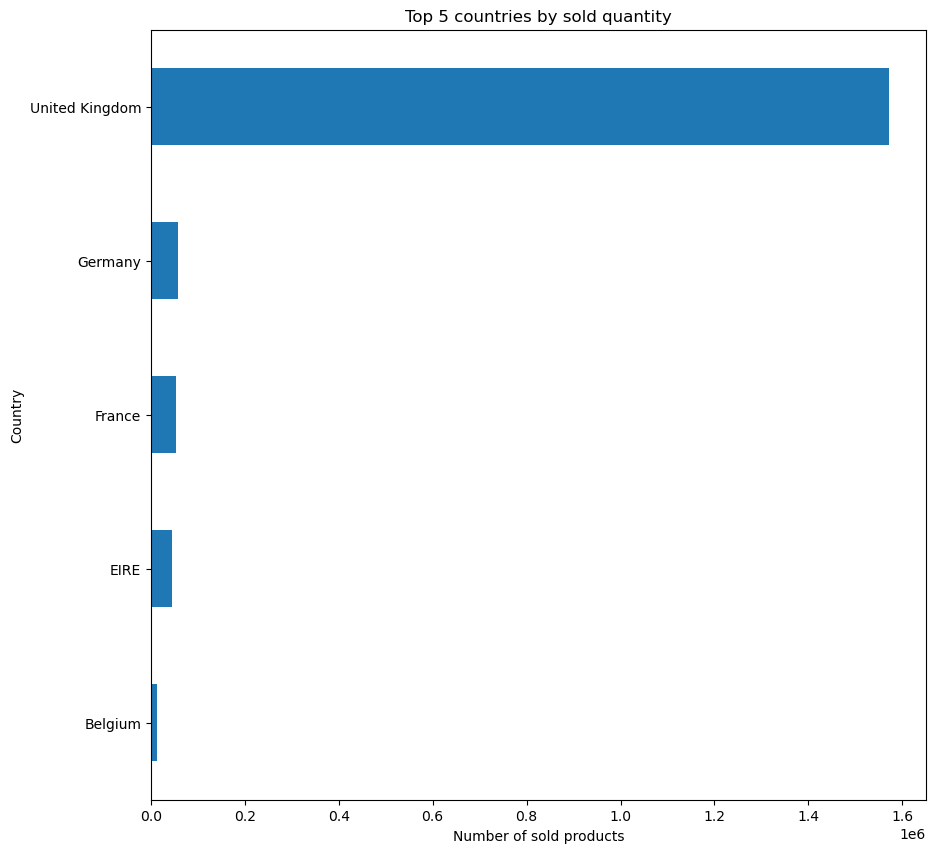

In [671]:
top_5 = df.groupby(by='Country')['Quantity'].sum().sort_values(ascending=False).nlargest(5)

top_5_sorted = top_5.sort_values(ascending=True)

# Plot the horizontal bar chart
top_5_sorted.plot(kind='barh', figsize=(10,10))

plt.title("Top 5 countries by sold quantity")
plt.xlabel('Number of sold products')
plt.ylabel('Country');

In [673]:
#Extract the year, month, and weekday from 'InvoiceDate' column 
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.strftime('%B')
df['WeekDay'] = df['InvoiceDate'].dt.strftime('%A')

In [674]:
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,WeekDay
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,United Kingdom,2010,December,Wednesday
1,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,United Kingdom,2010,December,Wednesday
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,United Kingdom,2010,December,Wednesday
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,United Kingdom,2010,December,Wednesday
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,United Kingdom,2010,December,Wednesday


#### Identify the busiest months in terms of sales ####

In [403]:
#determine the busiest months in terms of sales
df.Month.value_counts(ascending=False)

Month
November     60218
December     48056
October      43305
September    34987
July         29316
January      26953
June         26742
March        26571
May          25656
August       24850
April        21014
February     20487
Name: count, dtype: int64

From the above counts, most busiest month is November. Let's plot a histogram of sales by months. 

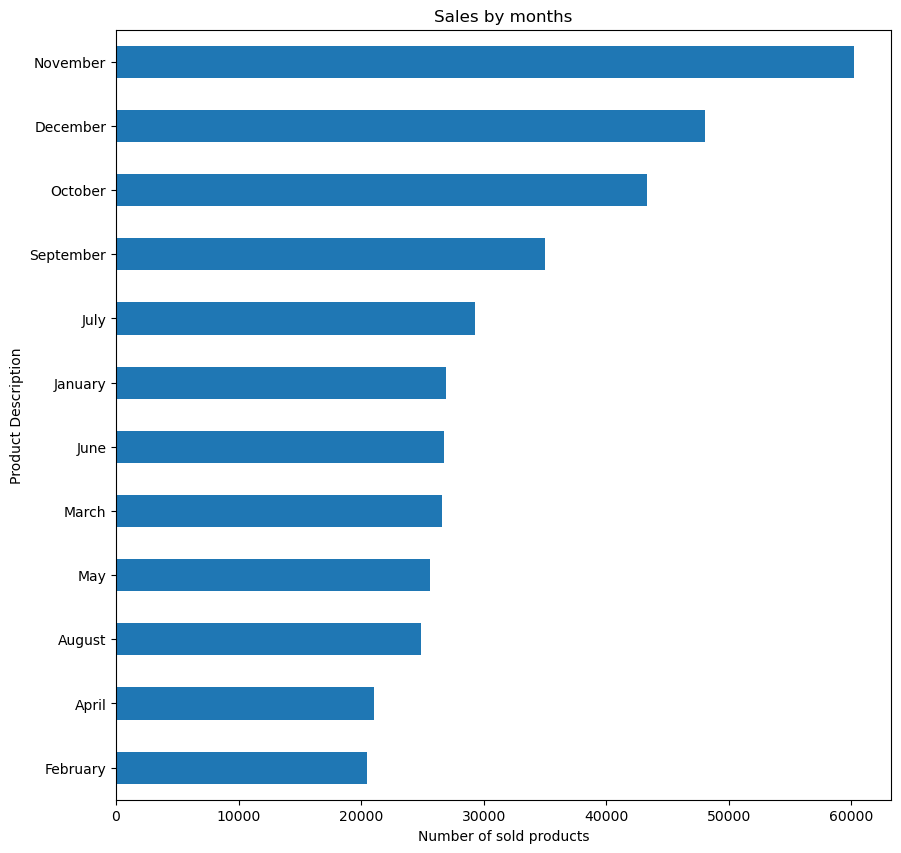

In [414]:
months_sales = df['Month'].value_counts(ascending=False).nlargest(40)

months_sales_sorted = months_sales.sort_values(ascending=True)

# Plot the horizontal bar chart
months_sales_sorted.plot(kind='barh', figsize=(10,10))

plt.title("Sales by months")
plt.xlabel('Number of sold products')
plt.ylabel('Product Description');

#### Identify the busiest days of the week in terms of sales ####

In [416]:
#determine the busiest weekdays in terms of sales
df.WeekDay.value_counts(ascending=False)

WeekDay
Tuesday      72136
Thursday     72065
Monday       69020
Wednesday    67305
Friday       59589
Sunday       48040
Name: count, dtype: int64

From the above counts, most busiest weekday is Tuesday. Let's plot a histogram of sales by months. 

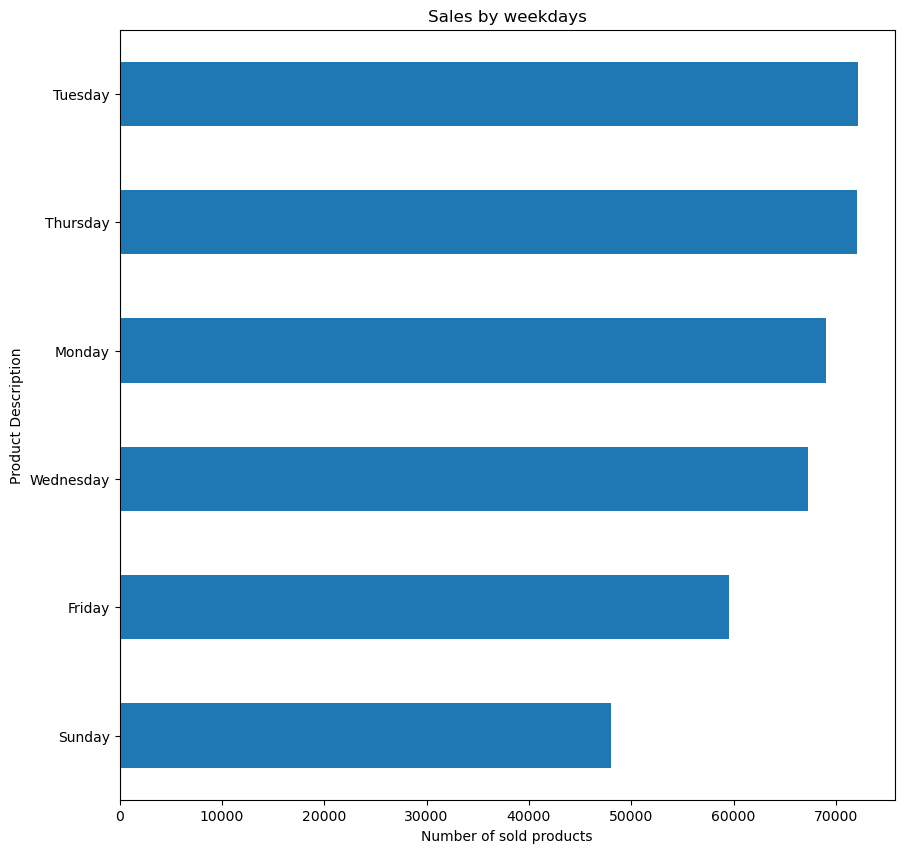

In [418]:
weekdays_sales = df['WeekDay'].value_counts(ascending=False).nlargest(40)

weekdays_sales_sorted = weekdays_sales.sort_values(ascending=True)

# Plot the horizontal bar chart
weekdays_sales_sorted.plot(kind='barh', figsize=(10,10))

plt.title("Sales by weekdays")
plt.xlabel('Number of sold products')
plt.ylabel('Product Description');

## Conclusion

#### Duplicate rows ####
There were even 71.183 duplicated rows, or approx. 13% of all data. This is significant percentage, so I propose their replacement with new unique data. 

#### Outliers ####
In the 'Quantity' column there were 52.547 outliers, which is approx. 11% of all data.
In the 'UnitPrice' column there were 28.570 outliers, or approx. 6% of all data.
I dropped the outliers from both 'Quantity' and 'UnitPrice' columns, but maybe the outliers from 'Quantity' column should be replaced with mean values because of the big percentage.


#### Insights ####
Top-selling product by quantity was JUMBO BAG RED RETROSPOT followed by WHITE HANGING HEART T-LIGHT HOLDER and LUNCH BAG RED RETROSPOT.
I propose to continue sucessful marketing campaigns on these three products, while for the rest products the company should allocate resources to promote those products better.
The busiest month in term of sales is November, followed by December and October. It is expected, because during November there are several traditional campaigns ("Black Friday" e.t.c.), and in December customers buy presents for Christmas and New Year.
Special attention and promotions should be applied in April and February, as the least busiest months in terms of sales.
The busiest weekdays are Tuesdays and Thursdays, with further focus on Fridays and Sundays as the least busiest weekdays. The dataset doesn't have records for sales in Saturdays, so this day is excluded from the analysis. Taking into account that the store is open 24/7/365, it should utilize the advantage of selling especially on Sundays, because the other retail stores are mostly closed.   